# <span style="color:salmon"> CUSTOMER CHURN PREDICTION

**Dataset: It is the dataset of a U.S. bank customer for getting the information that , this particular customer will leave
bank or not.**

**Objective: Develop a model to predict customer churn for a subscription- based service or business. Use historical
customer data, including features like usage behavior and customer demographics, and try algorithms like
Logistic Regression, Random Forests, or Gradient Boosting to predict churn.**

In [1]:
#!pip install category_encoders

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing  import LabelEncoder
import category_encoders as ce
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import chi2,f_classif,RFE,mutual_info_classif,SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from mlxtend.feature_selection import SequentialFeatureSelector, ExhaustiveFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
import pickle

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset
data = pd.read_csv('Churn_Modelling.csv', encoding='utf-8')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# <span style="color:red"> EDA

**<span style="color:darkblue"> DATA CLEANING** 

In [3]:
#examining the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
#checking for duplicated values
data[data.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [5]:
#dropping un-required columns
data.drop(columns={'RowNumber'},inplace=True)

In [6]:
#checking for null values
data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
#count of unique values in every column
data.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
#basic statistics of numerical columns
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
#correlation matrix
matrix = data.corr()
matrix

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


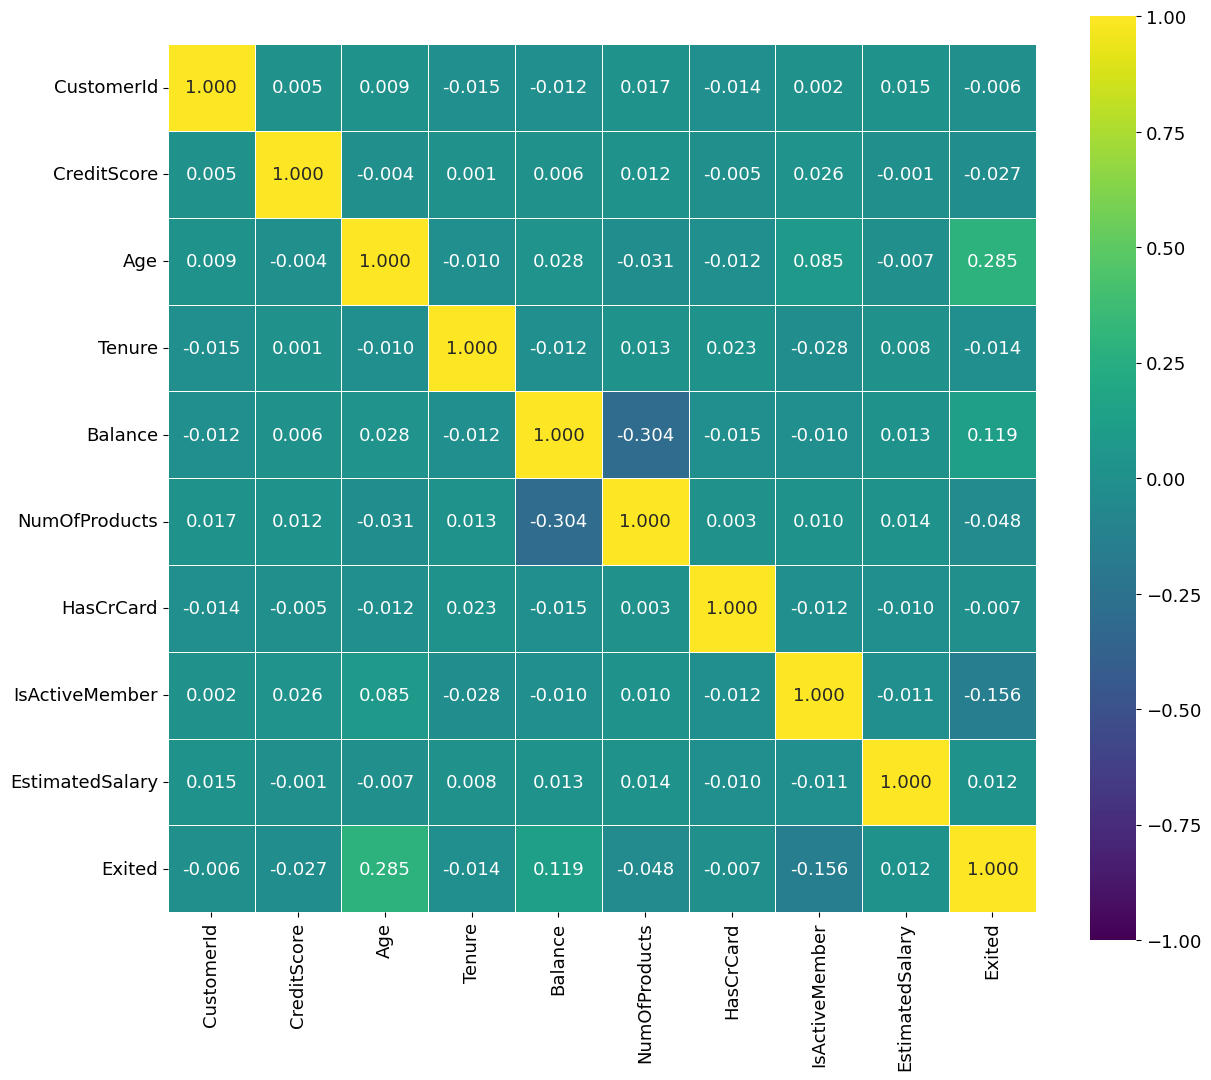

In [10]:
#annoted heatmap of the correlation matrix
plt.figure(figsize = (14,12))
plt.rcParams.update({'font.size': 13})
sns.heatmap(matrix, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".3f", square=True, linewidths=.5)
plt.show()

**<span style="color:darkblue">DATA TRANSFORMATION**

In [11]:
#Label Encoding for 'Geography' and 'Gender' columns
label = LabelEncoder()
data['Gender'] = label.fit_transform(data['Gender'])
data['Geography'] = label.fit_transform(data['Geography'])

In [12]:
#BaseNEncoding (base=64) for 'Surname' column
encoders= ce.BaseNEncoder(cols=['Surname'],return_df=True,base=64)
#fit and Transform Data 
data = encoders.fit_transform(data) 
data

,CustomerId,Surname_0,Surname_1,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,0,1,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,0,2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,0,3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,0,4,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,0,5,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,39,44,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,9,31,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,14,10,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,27,56,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [13]:
#reshape your data to a 2D array with a single column
cid = np.array(data.CustomerId).reshape(-1, 1)
cs = np.array(data.CreditScore).reshape(-1, 1)
a = np.array(data.Age).reshape(-1, 1)
tr = np.array(data.Tenure).reshape(-1, 1)
bal = np.array(data.Balance).reshape(-1, 1)
num = np.array(data.NumOfProducts).reshape(-1, 1)
cr = np.array(data.HasCrCard).reshape(-1, 1)
act = np.array(data.IsActiveMember).reshape(-1, 1)
est = np.array(data.EstimatedSalary).reshape(-1, 1)

In [14]:
#Normalizing the dataset 
#scaler = MinMaxScaler() 
#data['CustomerId'] = scaler.fit_transform(cid) 
#data['CreditScore'] = scaler.fit_transform(cs) 
#data['Age'] = scaler.fit_transform(a) 
#data['Tenure'] = scaler.fit_transform(tr) 
#data['Balance'] = scaler.fit_transform(bal) 
#data['NumOfProducts'] = scaler.fit_transform(num) 
#data['HasCrCard'] = scaler.fit_transform(cr) 
#data['IsActiveMember'] = scaler.fit_transform(act)
#data['EstimatedSalary'] = scaler.fit_transform(est) 

**<span style="color:darkblue">DATA VISUALIZATION**

In [15]:
#histograms of the numerical features
#figure, ax = plt.subplots(10,2,figsize = (12,15))
#sns.distplot(data['CustomerId'], ax=ax[0,0])
#sns.distplot(data['amt'], ax=ax[0,1])
#sns.distplot(data['zip'], ax=ax[1,0])
#sns.distplot(data['lat'], ax=ax[1,1])
#sns.distplot(data['long'], ax=ax[2,0])
#sns.distplot(data['city_pop'], ax=ax[2,1])
#sns.distplot(data['unix_time'], ax=ax[3,0])
#sns.distplot(data['merch_lat'], ax=ax[3,1])
#sns.distplot(data['merch_long'], ax=ax[4,0])
#plt.show()

**<span style="color:darkblue">OUTLIER DETECTION**

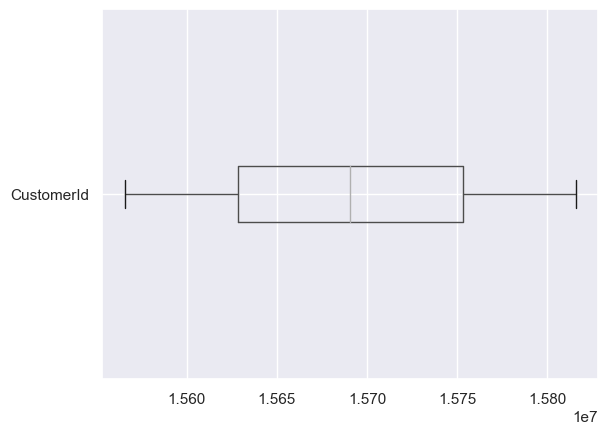

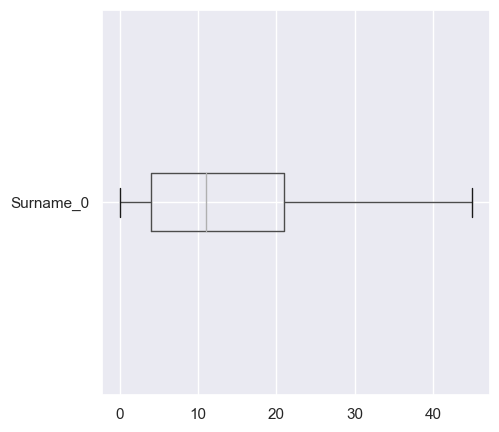

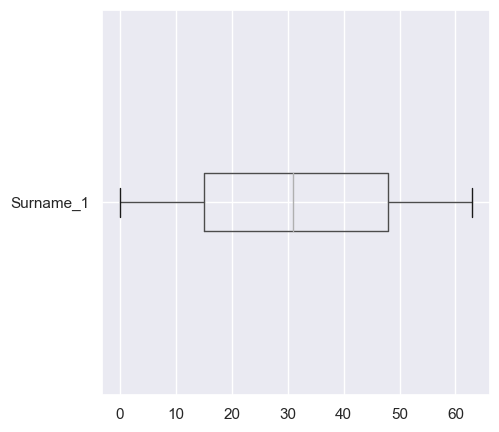

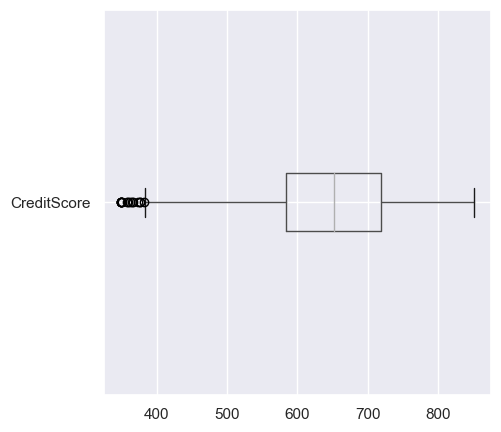

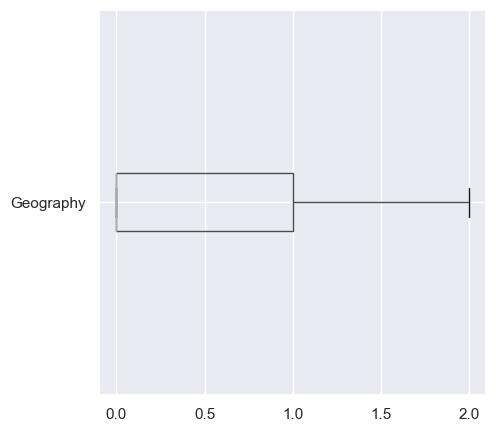

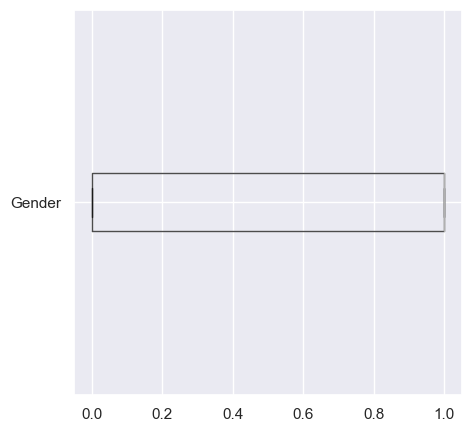

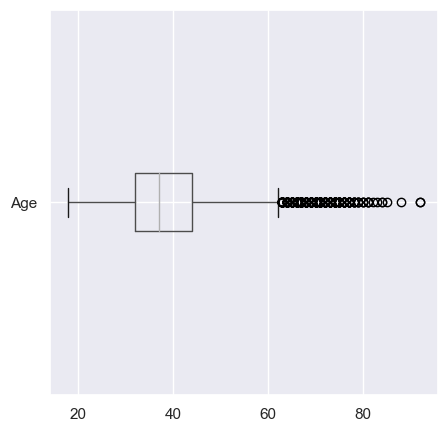

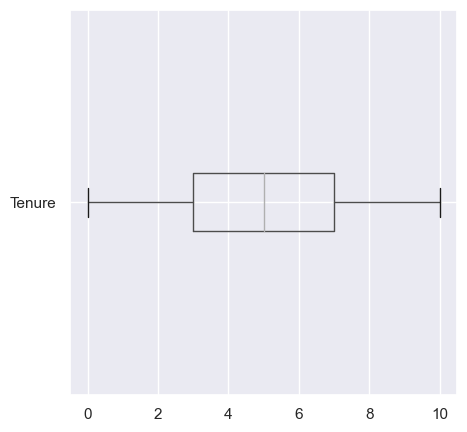

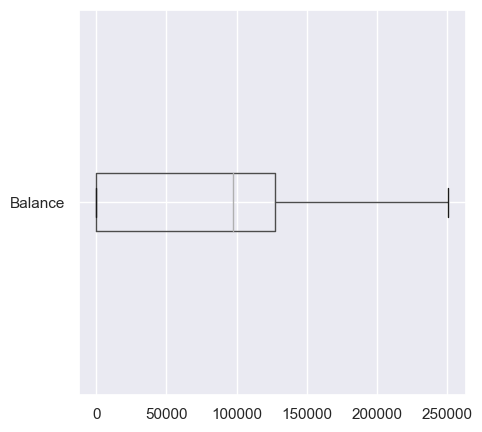

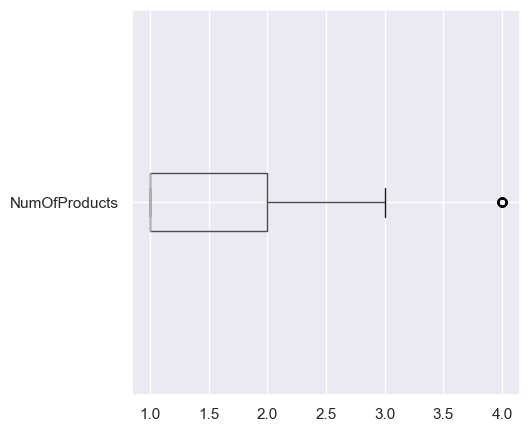

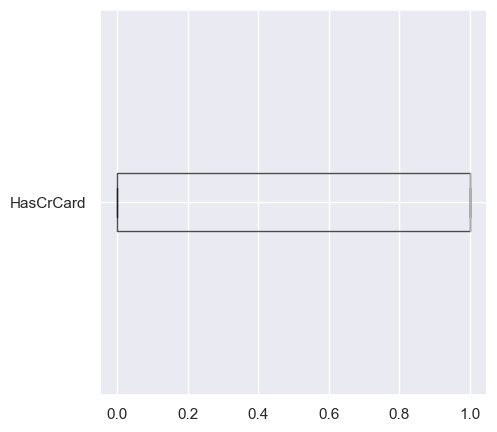

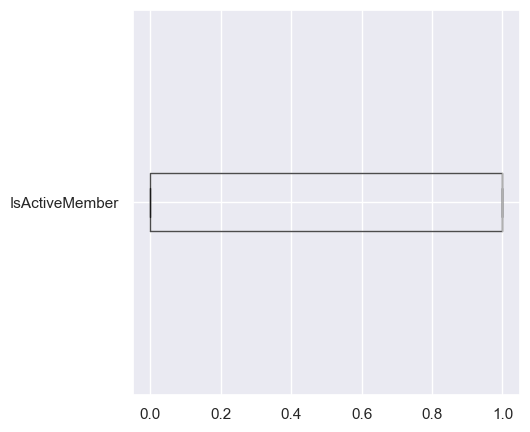

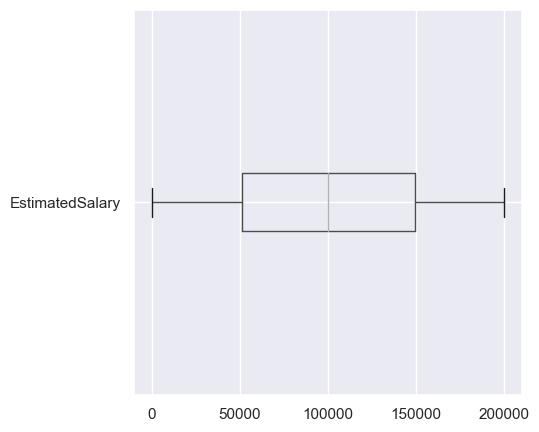

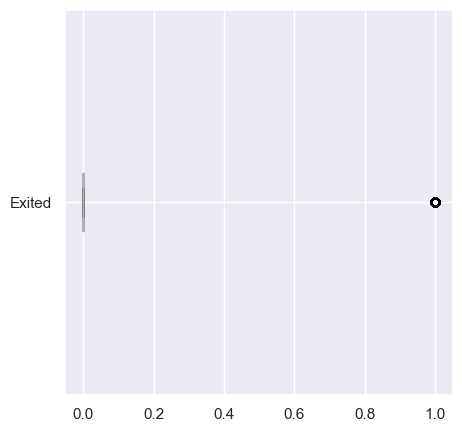

In [16]:
#boxplots for each column
for column in data:
    plt.figure()
    sns.set (rc = {'figure.figsize':(5,5)})
    data.boxplot([column],vert=False)

In [17]:
#applying Isolation Forest to find outliers
isolation_forest = IsolationForest(random_state=42, contamination=0.001)
pred = isolation_forest.fit_predict(data)
decision_func = isolation_forest.decision_function(data)

In [18]:
#adding anamoly scores column and anamoly column
data["anamoly_score"] = decision_func #average anomaly score
data["anamoly"] = pred #-1 for outliers and 1 for inliers
data

,CustomerId,Surname_0,Surname_1,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,anamoly_score,anamoly
0,15634602,0,1,619,0,0,42,2,0.00,1,1,1,101348.88,1,0.093438,1
1,15647311,0,2,608,2,0,41,1,83807.86,1,0,1,112542.58,0,0.082815,1
2,15619304,0,3,502,0,0,42,8,159660.80,3,1,0,113931.57,1,0.038681,1
3,15701354,0,4,699,0,0,39,1,0.00,2,0,0,93826.63,0,0.097697,1
4,15737888,0,5,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0.093351,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,39,44,771,0,1,39,5,0.00,2,1,0,96270.64,0,0.116039,1
9996,15569892,9,31,516,0,1,35,10,57369.61,1,1,1,101699.77,0,0.122380,1
9997,15584532,14,10,709,0,0,36,7,0.00,1,0,1,42085.58,1,0.063353,1
9998,15682355,27,56,772,1,1,42,3,75075.31,2,1,0,92888.52,1,0.075809,1


In [19]:
#dataset without outliers
data_no_outlier = data[data['anamoly'] == 1]
data_no_outlier

,CustomerId,Surname_0,Surname_1,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,anamoly_score,anamoly
0,15634602,0,1,619,0,0,42,2,0.00,1,1,1,101348.88,1,0.093438,1
1,15647311,0,2,608,2,0,41,1,83807.86,1,0,1,112542.58,0,0.082815,1
2,15619304,0,3,502,0,0,42,8,159660.80,3,1,0,113931.57,1,0.038681,1
3,15701354,0,4,699,0,0,39,1,0.00,2,0,0,93826.63,0,0.097697,1
4,15737888,0,5,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0.093351,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,39,44,771,0,1,39,5,0.00,2,1,0,96270.64,0,0.116039,1
9996,15569892,9,31,516,0,1,35,10,57369.61,1,1,1,101699.77,0,0.122380,1
9997,15584532,14,10,709,0,0,36,7,0.00,1,0,1,42085.58,1,0.063353,1
9998,15682355,27,56,772,1,1,42,3,75075.31,2,1,0,92888.52,1,0.075809,1


In [20]:
#dropping the 'anamoly score' and 'anamoly' columns from the above dataset
data_no_outlier.drop(columns={'anamoly','anamoly_score'},inplace=True)

In [21]:
#dataset with outlier records
outliers = data[data['anamoly'] == -1]
outliers

,CustomerId,Surname_0,Surname_1,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,anamoly_score,anamoly
555,15775318,6,55,590,2,0,51,3,154962.99,3,0,1,191932.27,1,-0.000307,-1
4013,15653776,28,3,720,1,0,57,1,162082.31,4,0,0,27145.73,1,-0.017847,-1
4166,15654562,2,3,850,2,0,45,5,174088.30,4,1,0,5669.31,1,-0.016014,-1
5700,15812888,34,22,447,0,1,41,3,0.00,4,1,1,197490.39,1,-0.001099,-1
7915,15803538,7,61,695,2,1,56,1,0.00,3,1,0,187734.49,1,-0.009934,-1
8098,15594391,41,2,770,0,0,68,2,183555.24,1,0,0,159557.28,1,-0.005312,-1
8683,15599329,42,58,697,0,0,49,7,195238.29,4,0,1,131083.56,1,-0.010909,-1
8953,15592925,16,0,711,2,1,42,3,177626.77,3,0,1,16392.72,1,-0.004367,-1
8963,15796993,43,34,741,0,1,52,1,171236.30,2,0,0,21834.40,1,-0.003435,-1
9255,15622033,44,7,847,1,0,41,3,101543.51,4,1,0,16025.17,1,-0.012769,-1


# <span style="color:red"> FEATURE SELECTION

In [22]:
#sepearating the target variable from the other variables
X = data_no_outlier.iloc[:,0:13]
Y = data_no_outlier.iloc[:,13]

**<span style="color:darkblue">SelectKBest Method**

In [23]:
#SelectKBest Method with score_func=chi2 and k=20
kbest = SelectKBest(score_func=chi2,k=8)
kbest.fit(X,Y)
kbest.get_feature_names_out()

array(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Balance', 'IsActiveMember', 'EstimatedSalary'], dtype=object)

In [24]:
#dataframe displaying the feature and their importance
temp = pd.DataFrame()
temp['Feature'] = X.columns.tolist()
temp['Score'] = kbest.scores_.tolist()
temp

,Feature,Score
0,CustomerId,1.288211e+02
1,Surname_0,3.948805e+00
2,Surname_1,5.870431e+00
3,CreditScore,1.150199e+02
4,Geography,1.150534e+01
5,Gender,5.116757e+01
6,Age,2.275788e+03
7,Tenure,2.639122e+00
8,Balance,6.972611e+06
9,NumOfProducts,6.359940e+00


In [25]:
#SelectKBest Method with score_func=mutual_info_classif and k=20
kbest_mf = SelectKBest(score_func=mutual_info_classif,k=8)
kbest_mf.fit(X,Y)
print('Features selected: ',kbest_mf.get_feature_names_out())

Features selected:  ['Surname_1' 'Geography' 'Age' 'Tenure' 'Balance' 'NumOfProducts'
 'HasCrCard' 'IsActiveMember']


In [26]:
#dataframe displaying the feature and their importance
temp1 = pd.DataFrame()
temp1['Feature'] = X.columns.tolist()
temp1['Score'] = kbest_mf.scores_.tolist()
temp1

,Feature,Score
0,CustomerId,0.000000
1,Surname_0,0.001808
2,Surname_1,0.011451
3,CreditScore,0.000000
4,Geography,0.011988
5,Gender,0.003025
6,Age,0.067964
7,Tenure,0.004039
8,Balance,0.010421
9,NumOfProducts,0.065598


In [27]:
#SelectKBest Method with score_func=f_classif and k=20
kbest_f = SelectKBest(score_func=f_classif,k=8)
kbest_f.fit(X,Y)
print('Features selected: ',kbest_f.get_feature_names_out())

Features selected:  ['CreditScore' 'Geography' 'Gender' 'Age' 'Tenure' 'Balance'
 'NumOfProducts' 'IsActiveMember']


In [28]:
#dataframe displaying the feature and their importance
temp2 = pd.DataFrame()
temp2['Feature'] = X.columns.tolist()
temp2['Score'] = kbest_f.scores_.tolist()
temp2

,Feature,Score
0,CustomerId,0.390803
1,Surname_0,0.400479
2,Surname_1,0.532868
3,CreditScore,8.020050
4,Geography,12.552038
5,Gender,113.927948
6,Age,876.273710
7,Tenure,1.582224
8,Balance,138.913157
9,NumOfProducts,29.108840


In [29]:
#Recursive Feature Elimination with Logistic Regression
lg_reg = LogisticRegression()
rfe = RFE(lg_reg)
rfe.fit(X,Y)
print('Number of features selected: ',rfe.n_features_,"\n")
print('Features selected: ',rfe.get_feature_names_out())

Number of features selected:  6 

Features selected:  ['CustomerId' 'Surname_1' 'CreditScore' 'Age' 'Balance' 'EstimatedSalary']


**<span style="color:darkblue">Feature selection using Decision Tree Classifer**

In [30]:
#Decision Tree Classifer 
tree = DecisionTreeClassifier()
tree.fit(X,Y)

#dataframe with feature and their importance
temp3 = pd.DataFrame()
temp3["Feature"] = X.columns.tolist()
temp3["Score"] = tree.feature_importances_.tolist()
temp3

,Feature,Score
0,CustomerId,0.092054
1,Surname_0,0.060318
2,Surname_1,0.084142
3,CreditScore,0.097983
4,Geography,0.026264
5,Gender,0.012605
6,Age,0.197994
7,Tenure,0.044303
8,Balance,0.110937
9,NumOfProducts,0.114510


In [31]:
#selecting features based on RFE method 
x = data_no_outlier.loc[:, ['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Balance', 'IsActiveMember', 'EstimatedSalary']]
#target variable
y = Y

# <span style="color:red"> MODEL BUILDING

In [32]:
#balancing the imbalnced dataset (Oversampling)
ROS = RandomOverSampler()
X_res, Y_res = ROS.fit_resample(x,y)

In [33]:
#train_test split
X_res_train, X_res_test,Y_res_train, Y_res_test = train_test_split(X_res, Y_res, test_size=0.32, random_state=42)

**<span style="color:darkblue">K-NEAREST NEIGHBOURS (KNN)**

In [34]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_res_train,Y_res_train)

KNeighborsClassifier(n_neighbors=2)

In [35]:
#Train data accuracy score
train1 = knn.predict(X_res_train)
acc1 = accuracy_score(Y_res_train,train1)*100
print("Accuracy score =", acc1)

Accuracy score = 97.56210176378244


In [36]:
#Test data accuracy score
y_pred = knn.predict(X_res_test)
acc_k = accuracy_score(Y_res_test,y_pred)*100

#printing the accuracy score, confusion matrix and classification report 
print("Accuracy score:", acc_k,"\n")
print("Confusion Matrix:\n",confusion_matrix(Y_res_test,y_pred),"\n")
print("Classification report:\n",classification_report(Y_res_test,y_pred),"\n")

Accuracy score: 77.96743182264076 

Confusion Matrix:
 [[1985  622]
 [ 501 1989]] 

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78      2607
           1       0.76      0.80      0.78      2490

    accuracy                           0.78      5097
   macro avg       0.78      0.78      0.78      5097
weighted avg       0.78      0.78      0.78      5097
 



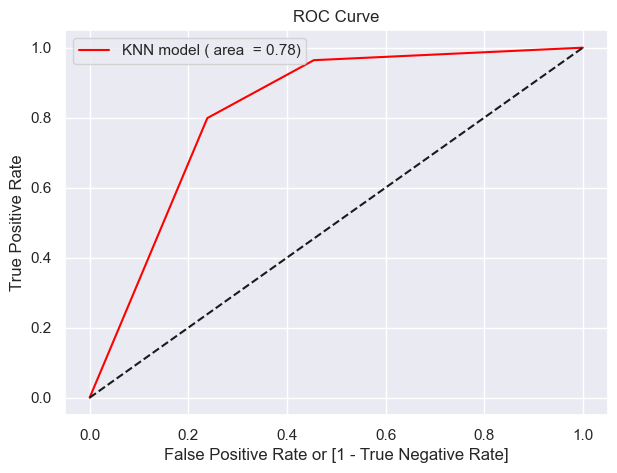

In [37]:
#plotting the ROC curve
fpr, tpr, thresholds = roc_curve(Y_res_test, knn.predict_proba (X_res_test)[:,1])
auc = roc_auc_score(Y_res_test, y_pred)

sns.set (rc = {'figure.figsize':(7,5)})
plt.plot(fpr, tpr, color='red', label='KNN model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [38]:
#hyper-parameter tuning 
est_k = KNeighborsClassifier()
param_k = dict(n_neighbors=np.arange(2,42))
k_random = RandomizedSearchCV(estimator = est_k, param_distributions = param_k, 
                              n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1).fit(X_res_train,Y_res_train)

Fitting 2 folds for each of 40 candidates, totalling 80 fits


In [39]:
#printing the best parameters, best score of GridSearchCV
print("Best Parameters:",k_random.best_params_)
print("Best Score:",k_random.best_score_)

Best Parameters: {'n_neighbors': 2}
Best Score: 0.6562013397774178


**<span style="color:darkblue">LOGISTIC REGRESSION**

In [40]:
lg = LogisticRegression(class_weight='balanced')
lg.fit(X_res_train,Y_res_train)

LogisticRegression(class_weight='balanced')

In [41]:
#Train data accuracy score
train2 = lg.predict(X_res_train)
acc2 = accuracy_score(Y_res_train,train2)*100
print("Accuracy score =", acc2)

Accuracy score = 57.327546403176655


In [42]:
#Test data accuracy score
y_pred1 = lg.predict(X_res_test)
acc_lg = accuracy_score(Y_res_test,y_pred1)*100

#printing the accuracy score, confusion matrix and classification report 
print("Accuracy score:", acc_lg,"\n")
print("Confusion Matrix:\n",confusion_matrix(Y_res_test,y_pred1),"\n")
print("Classification report:\n",classification_report(Y_res_test,y_pred1),"\n")

Accuracy score: 56.79811653914067 

Confusion Matrix:
 [[1165 1442]
 [ 760 1730]] 

Classification report:
               precision    recall  f1-score   support

           0       0.61      0.45      0.51      2607
           1       0.55      0.69      0.61      2490

    accuracy                           0.57      5097
   macro avg       0.58      0.57      0.56      5097
weighted avg       0.58      0.57      0.56      5097
 



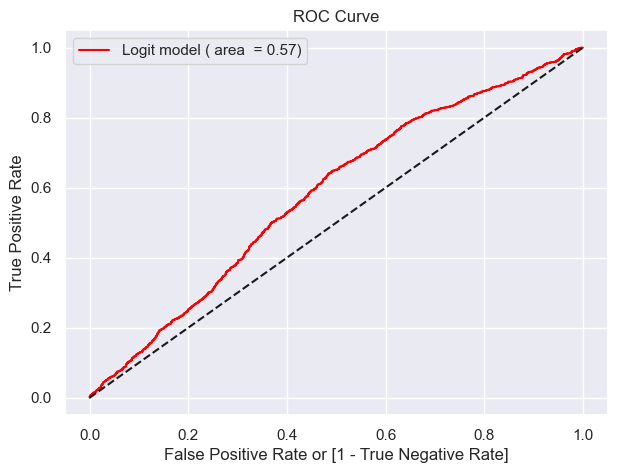

In [43]:
#plotting the ROC curve
fpr, tpr, thresholds = roc_curve(Y_res_test, lg.predict_proba (X_res_test)[:,1])
auc = roc_auc_score(Y_res_test, y_pred1)

sns.set (rc = {'figure.figsize':(7,5)})
plt.plot(fpr, tpr, color='red', label='Logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [44]:
#hyper-parameter tuning
est_lg = LogisticRegression()
weights = np.linspace(0.0,0.99,200)
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}
gridsearch = GridSearchCV(estimator= est_lg, param_grid= param_grid, cv=StratifiedKFold(),
                          n_jobs=-1,scoring='f1',verbose=2).fit(X_res_train, Y_res_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [45]:
#printing the best parameters, best score of GridSearchCV
print("Best Parameters:",gridsearch.best_params_)
print("Best Score:",gridsearch.best_score_)

Best Parameters: {'class_weight': {0: 0.0, 1: 1.0}}
Best Score: 0.6714513283543038


**<span style="color:darkblue">RANDOM FOREST**

In [46]:
rf = RandomForestClassifier(bootstrap=False, max_depth=100, max_features='auto',
                            min_samples_leaf=2, n_estimators=500)
rf.fit(X_res_train, Y_res_train)

RandomForestClassifier(bootstrap=False, max_depth=100, max_features='auto',
                       min_samples_leaf=2, n_estimators=500)

In [47]:
#Train data accuracy score
train3 = rf.predict(X_res_train)
acc3 = accuracy_score(Y_res_train,train3)*100
print("Accuracy score =", acc3)

Accuracy score = 99.97229661095207


In [48]:
#Test data accuracy score
y_pred2 = rf.predict(X_res_test)
acc_rf = accuracy_score(Y_res_test,y_pred2)*100

#printing the accuracy score, confusion matrix and classification report 
print("Accuracy score:", acc_rf,"\n")
print("Confusion Matrix:\n",confusion_matrix(Y_res_test,y_pred2),"\n")
print("Classification report:\n",classification_report(Y_res_test,y_pred2),"\n")

Accuracy score: 93.0351186972729 

Confusion Matrix:
 [[2349  258]
 [  97 2393]] 

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      2607
           1       0.90      0.96      0.93      2490

    accuracy                           0.93      5097
   macro avg       0.93      0.93      0.93      5097
weighted avg       0.93      0.93      0.93      5097
 



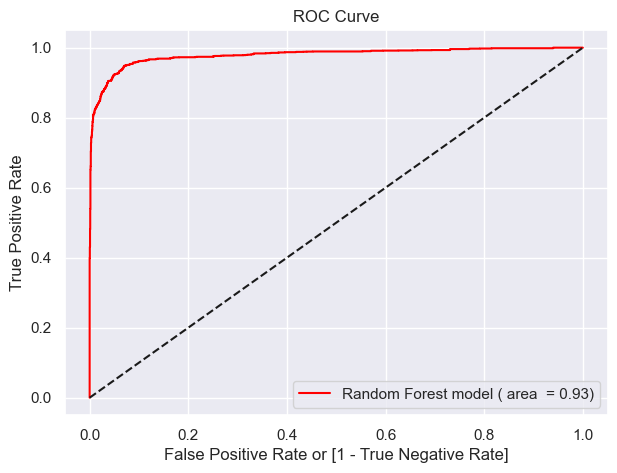

In [49]:
#plotting the ROC curve
fpr, tpr, thresholds = roc_curve(Y_res_test, rf.predict_proba (X_res_test)[:,1])
auc = roc_auc_score(Y_res_test, y_pred2)

sns.set (rc = {'figure.figsize':(7,5)})
plt.plot(fpr, tpr, color='red', label='Random Forest model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [50]:
#hyper-parameter tuning
estimator_rf = RandomForestClassifier()
param_rf = [{'max_depth': [2,3,5,None],'min_samples_leaf': [2,4,5],
             'n_estimators': [100,300,500],'max_features':['auto','sqrt'],
             'max_depth':[10,50,100],'min_samples_split':[2,5,10],
             'bootstrap':[True, False]}]
rf_random = RandomizedSearchCV(estimator = estimator_rf, param_distributions = param_rf, 
                               n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_res_train,Y_res_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 50, 100],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [2, 4, 5],
                                         'min_samples_split': [2, 5, 10],
                                         'n_estimators': [100, 300, 500]}],
                   random_state=42, verbose=2)

In [51]:
#printing the best parameters, best score of GridSearchCV
print("Best Parameters:",rf_random.best_params_)
print("Best Score:",rf_random.best_score_)

Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': False}
Best Score: 0.8613914678984513


**<span style="color:darkblue">SUPPORT VECTOR MACHINE (SVM)**

In [52]:
svm = SVC(C=10, gamma=100, probability=True)
svm.fit(X_res_train,Y_res_train)

SVC(C=10, gamma=100, probability=True)

In [53]:
#Train data accuracy score
train4 = svm.predict(X_res_train)
acc4 = accuracy_score(Y_res_train,train4)*100
print("Accuracy score =", acc4)

Accuracy score = 100.0


In [54]:
#Test data accuracy score
y_pred3 = svm.predict(X_res_test)
acc_s = accuracy_score(Y_res_test,y_pred3)*100

#printing the accuracy score, confusion matrix and classification report 
print("Accuracy score:", acc_s,"\n")
print("Confusion Matrix:\n",confusion_matrix(Y_res_test,y_pred3),"\n")
print("Classification report:\n",classification_report(Y_res_test,y_pred3),"\n")

Accuracy score: 97.0963311752011 

Confusion Matrix:
 [[2607    0]
 [ 148 2342]] 

Classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2607
           1       1.00      0.94      0.97      2490

    accuracy                           0.97      5097
   macro avg       0.97      0.97      0.97      5097
weighted avg       0.97      0.97      0.97      5097
 



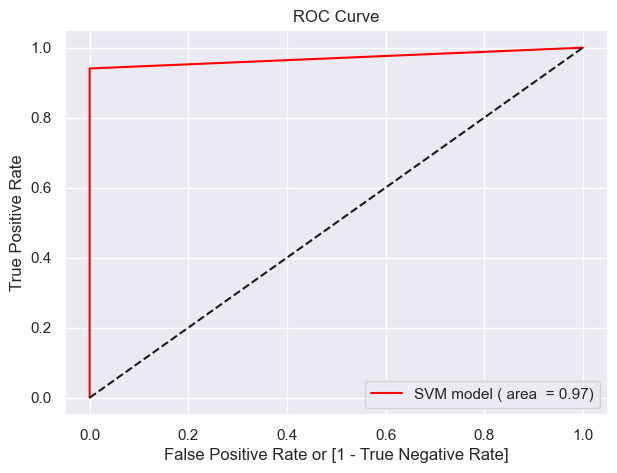

In [55]:
#plotting the ROC curve
fpr, tpr, thresholds = roc_curve(Y_res_test, svm.predict_proba (X_res_test)[:,1])
auc = roc_auc_score(Y_res_test, y_pred3)

sns.set (rc = {'figure.figsize':(7,5)})
plt.plot(fpr, tpr, color='red', label='SVM model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [56]:
#hyper-parameter tuning
est_s = SVC()
param_s = [{'kernel':['linear','rbf'],'C':[0.0001, 1],'gamma':[1, 10]}]
param_s = [{'kernel':['linear','rbf'],'C':[0.0001, 1, 10],'gamma':[1, 10, 100]}]
svm_random = RandomizedSearchCV(est_s, param_distributions=param_s, n_iter=50, cv=2, scoring='accuracy')
svm_random.fit(X_res_train,Y_res_train)

RandomizedSearchCV(cv=2, estimator=SVC(), n_iter=50,
                   param_distributions=[{'C': [0.0001, 1, 10],
                                         'gamma': [1, 10, 100],
                                         'kernel': ['linear', 'rbf']}],
                   scoring='accuracy')

In [57]:
#printing the best parameters, best score of GridSearchCV
print("Best Parameters:",svm_random.best_params_)
print("Best Score:",svm_random.best_score_)

Best Parameters: {'kernel': 'rbf', 'gamma': 1, 'C': 1}
Best Score: 0.8603747474571757


**<span style="color:darkblue">NAIVE BAYES**

In [58]:
nb = BernoulliNB()
nb.fit(X_res_train,Y_res_train)

BernoulliNB()

In [59]:
#Train data accuracy score
train5 = nb.predict(X_res_train)
acc5 = accuracy_score(Y_res_train,train5)*100
print("Accuracy score =", acc5)

Accuracy score = 62.32339089481946


In [60]:
#Test data accuracy score
y_pred4 = nb.predict(X_res_test)
acc_n = accuracy_score(Y_res_test,y_pred4)*100

#printing the accuracy score, confusion matrix and classification report 
print("Accuracy score:", acc_n,"\n")
print("Confusion Matrix:\n",confusion_matrix(Y_res_test,y_pred4),"\n")
print("Classification report:\n",classification_report(Y_res_test,y_pred4),"\n")

Accuracy score: 62.016872670198154 

Confusion Matrix:
 [[1619  988]
 [ 948 1542]] 

Classification report:
               precision    recall  f1-score   support

           0       0.63      0.62      0.63      2607
           1       0.61      0.62      0.61      2490

    accuracy                           0.62      5097
   macro avg       0.62      0.62      0.62      5097
weighted avg       0.62      0.62      0.62      5097
 



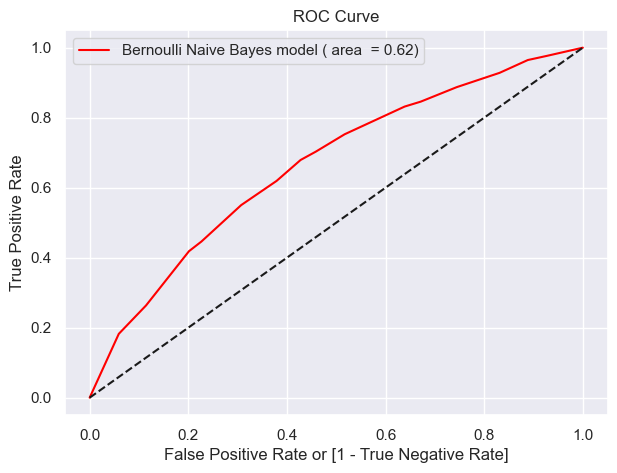

In [61]:
#plotting the ROC curve
fpr, tpr, thresholds = roc_curve(Y_res_test, nb.predict_proba (X_res_test)[:,1])
auc = roc_auc_score(Y_res_test, y_pred4)

sns.set (rc = {'figure.figsize':(7,5)})
plt.plot(fpr, tpr, color='red', label='Bernoulli Naive Bayes model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

**<span style="color:darkblue">EXTREME GRADIENT BOOSTING (XGBOOST)**

In [62]:
xgb = XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1)
xgb.fit(X_res_train,Y_res_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
#Train data accuracy score
train6 = xgb.predict(X_res_train)
acc6 = accuracy_score(Y_res_train,train6)*100
print("Accuracy score =", acc6)

Accuracy score = 98.95650567919475


In [64]:
#Test data accuracy score
y_pred5 = xgb.predict(X_res_test)
acc_x = accuracy_score(Y_res_test,y_pred5)*100

#printing the accuracy score, confusion matrix and classification report 
print("Accuracy score:", acc_x,"\n")
print("Confusion Matrix:\n",confusion_matrix(Y_res_test,y_pred5),"\n")
print("Classification report:\n",classification_report(Y_res_test,y_pred5),"\n")

Accuracy score: 89.71944280949579 

Confusion Matrix:
 [[2238  369]
 [ 155 2335]] 

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90      2607
           1       0.86      0.94      0.90      2490

    accuracy                           0.90      5097
   macro avg       0.90      0.90      0.90      5097
weighted avg       0.90      0.90      0.90      5097
 



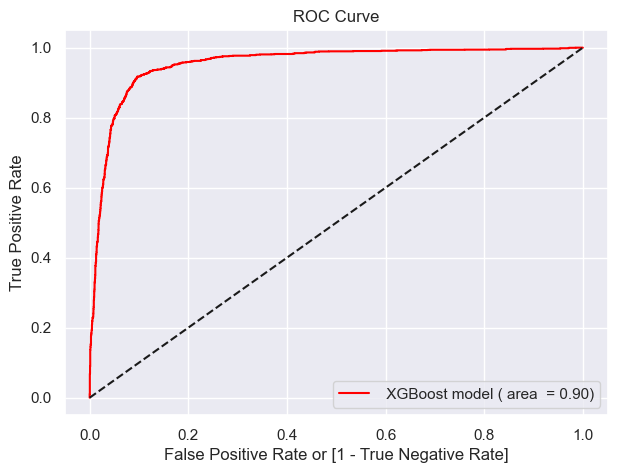

In [65]:
#plotting the ROC curve
fpr, tpr, thresholds = roc_curve(Y_res_test, xgb.predict_proba (X_res_test)[:,1])
auc = roc_auc_score(Y_res_test, y_pred5)

sns.set (rc = {'figure.figsize':(7,5)})
plt.plot(fpr, tpr, color='red', label=' XGBoost model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [66]:
#hyper-parameter tuning 
param_dist = {'max_depth': [3,5,7,10],'learning_rate': [0.1,0.01,0.001],'n_estimators':[50,100,200,500]}
xgb_model = XGBClassifier()
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=100, cv=2, scoring='accuracy')
random_search.fit(X_res_train, Y_res_train)

RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=100,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   scoring='accuracy')

In [67]:
#printing the best parameters, best score of GridSearchCV
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best parameters: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}
Best score: 0.8475395515405667


**<span style="color:darkblue">LIGHT GRADIENT BOOSTING MACHINE (LGBM)**

In [68]:
lgb = LGBMClassifier(learning_rate=0.2, n_estimators=200, num_class=1, objective='binary')
lgb.fit(X_res_train,Y_res_train)

[LightGBM] [Info] Number of positive: 5473, number of negative: 5356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1094
[LightGBM] [Info] Number of data points in the train set: 10829, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505402 -> initscore=0.021609
[LightGBM] [Info] Start training from score 0.021609


LGBMClassifier(learning_rate=0.2, n_estimators=200, num_class=1,
               objective='binary')

In [69]:
#Train data accuracy score
train7 = lgb.predict(X_res_train)
acc7 = accuracy_score(Y_res_train,train7)*100
print("Accuracy score =", acc7)

Accuracy score = 97.96841813648535


In [70]:
#Test data accuracy score
y_pred6 = lgb.predict(X_res_test)
acc_lgb = accuracy_score(Y_res_test,y_pred6)*100

#printing the accuracy score, confusion matrix and classification report 
print("Accuracy score:", acc_lgb,"\n")
print("Confusion Matrix:\n",confusion_matrix(Y_res_test,y_pred6),"\n")
print("Classification report:\n",classification_report(Y_res_test,y_pred6),"\n")

Accuracy score: 88.77771237983127 

Confusion Matrix:
 [[2200  407]
 [ 165 2325]] 

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88      2607
           1       0.85      0.93      0.89      2490

    accuracy                           0.89      5097
   macro avg       0.89      0.89      0.89      5097
weighted avg       0.89      0.89      0.89      5097
 



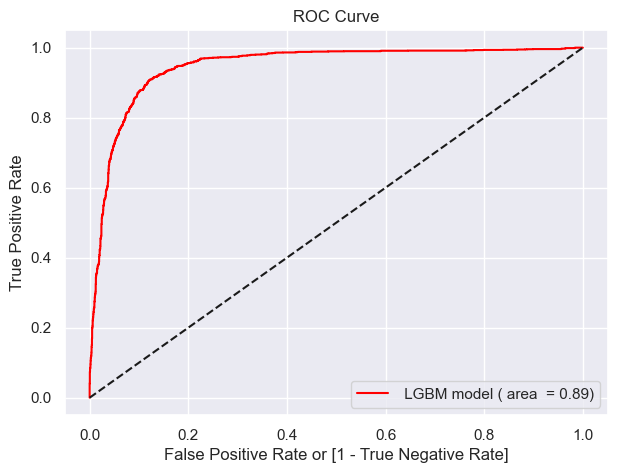

In [71]:
#plotting the ROC curve
fpr, tpr, thresholds = roc_curve(Y_res_test, lgb.predict_proba (X_res_test)[:,1])
auc = roc_auc_score(Y_res_test, y_pred6)

sns.set (rc = {'figure.figsize':(7,5)})
plt.plot(fpr, tpr, color='red', label=' LGBM model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [72]:
#hyper-parameter tuning
param_grid = {'num_leaves': [5, 20, 31],'learning_rate': [0.05, 0.1, 0.2],'n_estimators': [50, 100, 150, 200]}
lgb_classifier = LGBMClassifier(objective='binary', num_class=1)
rcv = RandomizedSearchCV(estimator=lgb_classifier, param_distributions=param_grid,scoring='accuracy', cv=2)
rcv.fit(X_res_train, Y_res_train)

[LightGBM] [Info] Number of positive: 2736, number of negative: 2678
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000730 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 5414, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505356 -> initscore=0.021427
[LightGBM] [Info] Start training from score 0.021427
[LightGBM] [Info] Number of positive: 2737, number of negative: 2678
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000699 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1090
[LightGBM] [Info] Number of data points in the train set: 5415, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505448 -> initscore=0.021792
[LightGBM] [Info] Start training from score 0.021792
[LightGBM] [Info] Number

[LightGBM] [Info] Number of positive: 2737, number of negative: 2678
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000750 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1090
[LightGBM] [Info] Number of data points in the train set: 5415, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505448 -> initscore=0.021792
[LightGBM] [Info] Start training from score 0.021792
[LightGBM] [Info] Number of positive: 2736, number of negative: 2678
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000618 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 5414, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505356 -> initscore=0.021427
[LightGBM] [Info] Start training from score 0.021427
[LightGBM] [Info] Number

RandomizedSearchCV(cv=2,
                   estimator=LGBMClassifier(num_class=1, objective='binary'),
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2],
                                        'n_estimators': [50, 100, 150, 200],
                                        'num_leaves': [5, 20, 31]},
                   scoring='accuracy')

In [73]:
print("Best Parameters:",rcv.best_params_)
print("Best Score:",rcv.best_score_)

Best Parameters: {'num_leaves': 31, 'n_estimators': 100, 'learning_rate': 0.2}
Best Score: 0.8182661244521487


**<span style="color:darkblue">Choosing the final model**

In [74]:
#comparing the train and test accuracy scores of all the models
df_acc = pd.DataFrame({"Model":['Logistic Regression','KNN','Naive Bayes','SVM','Random Forest','XGBoost','LGBM'],
                       "Training accuracy":[acc2,acc1,acc5,acc4,acc3,acc6,acc7],
                       "Testing accuracy":[acc_lg,acc_k,acc_n,acc_s,acc_rf,acc_x,acc_lgb]})
df_acc

,Model,Training accuracy,Testing accuracy
0,Logistic Regression,57.327546,56.798117
1,KNN,97.562102,77.967432
2,Naive Bayes,62.323391,62.016873
3,SVM,100.000000,97.096331
4,Random Forest,99.972297,93.035119
5,XGBoost,98.956506,89.719443
6,LGBM,97.968418,88.777712


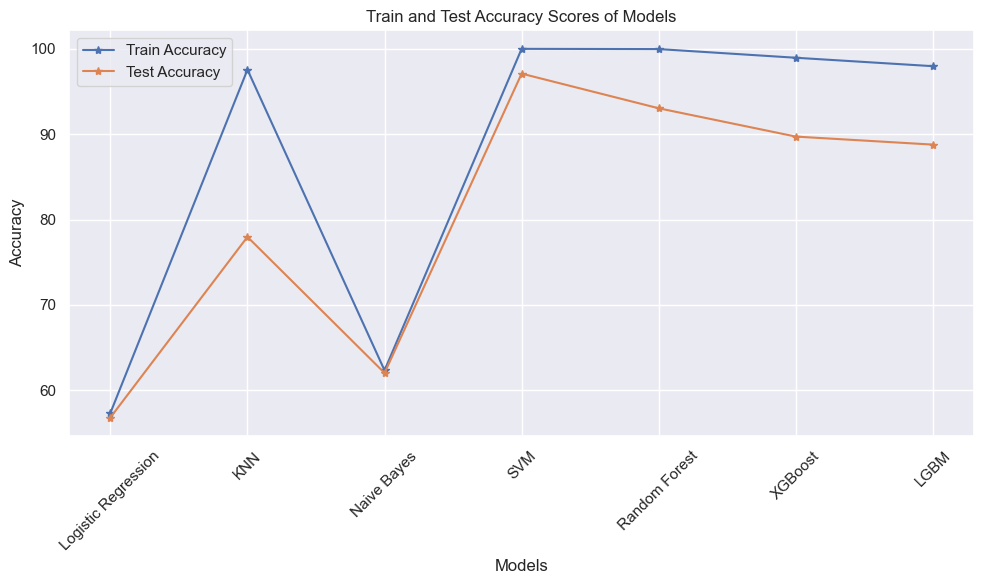

In [75]:
plt.figure(figsize=(10, 6))
plt.plot(df_acc.Model, df_acc['Training accuracy'], marker='*', label='Train Accuracy')
plt.plot(df_acc.Model, df_acc['Testing accuracy'], marker='*', label='Test Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy Scores of Models')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [76]:
model =  SVC(C=10, gamma=100, probability=True)
model.fit(X_res,Y_res)

SVC(C=10, gamma=100, probability=True)

# <span style="color:red">STREAMLIT DEPLOYMENT

In [77]:
filename = 'churn_prediction.sav'
pickle.dump(model, open(filename, 'wb'))